In [38]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering
import matplotlib
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [39]:
df = pd.read_csv("~/Downloads/discover_pattern.csv")
df

,85,92,45,27,31,0.0,1
0,85,64,59,32,23,0.0,2
1,86,54,33,16,54,0.0,2
2,91,78,34,24,36,0.0,2
3,87,70,12,28,10,0.0,2
4,98,55,13,17,17,0.0,2
...,...,...,...,...,...,...,...
339,99,75,26,24,41,12.0,1
340,96,69,53,43,203,12.0,2
341,98,77,55,35,89,15.0,1
342,91,68,27,26,14,16.0,1


In [40]:
newdf= df.rename(columns = {'85': 'MCV', '92': 'Alkphos', '45': 'Sgpt', '27': 'Sgot', '31': 'Gammagt'})
drop_new = newdf.drop(["0.0","1"], axis=1)

In [41]:
drop_new.describe()

,MCV,Alkphos,Sgpt,Sgot,Gammagt
count,344.000000,344.000000,344.000000,344.000000,344.000000
mean,90.174419,69.805233,30.363372,24.636628,38.305233
std,4.445830,18.335388,19.524790,10.078349,39.309824
min,65.000000,23.000000,4.000000,5.000000,5.000000
25%,87.000000,57.000000,19.000000,19.000000,15.000000
50%,90.000000,67.000000,26.000000,23.000000,24.500000
75%,93.000000,80.000000,34.000000,27.000000,46.250000
max,103.000000,138.000000,155.000000,82.000000,297.000000


<AxesSubplot:>

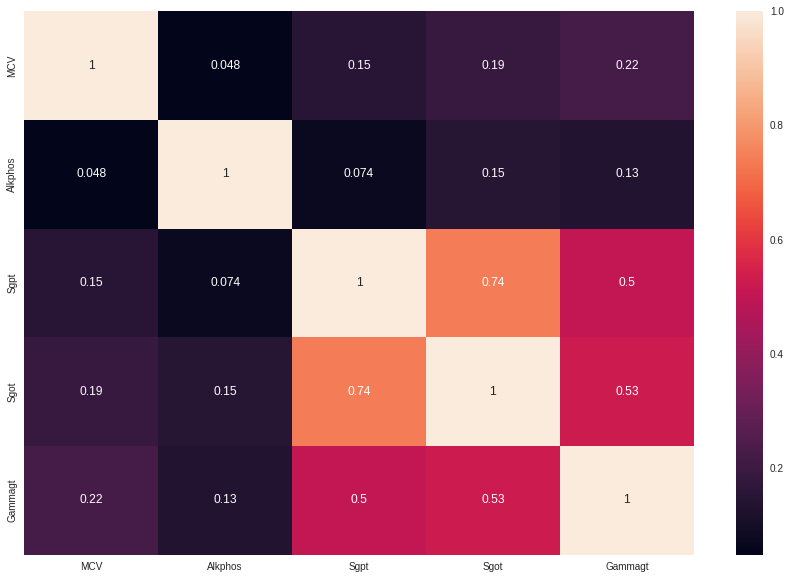

In [42]:
plt.figure(figsize = (15, 10))
sns.heatmap(drop_new.corr(), annot=True)

In [43]:
std_scale = MinMaxScaler() 
X_scaled = pd.DataFrame(std_scale.fit_transform(drop_new), columns= drop_new.columns)
X_scaled

,MCV,Alkphos,Sgpt,Sgot,Gammagt
0,0.526316,0.356522,0.364238,0.350649,0.061644
1,0.552632,0.269565,0.192053,0.142857,0.167808
2,0.684211,0.478261,0.198675,0.246753,0.106164
3,0.578947,0.408696,0.052980,0.298701,0.017123
4,0.868421,0.278261,0.059603,0.155844,0.041096
...,...,...,...,...,...
339,0.894737,0.452174,0.145695,0.246753,0.123288
340,0.815789,0.400000,0.324503,0.493506,0.678082
341,0.868421,0.469565,0.337748,0.389610,0.287671
342,0.684211,0.391304,0.152318,0.272727,0.030822


In [58]:
pca = PCA(n_components= 5)
model = pca.fit(X_scaled)
model_transform = pca.transform(X_scaled)
# print(model.explained_variance_ratio_)
model_transform

array([[-0.6366311 ,  0.12119678,  0.12123072,  0.16242029, -0.11589542],
       [-0.65176121, -0.04300242,  0.08801633,  0.04999271,  0.10959456],
       [ 1.35839549, -0.0270908 ,  0.06281303, -0.08242551, -0.00200394],
       ...,
       [ 0.36934848,  0.30088319, -0.07171316, -0.13464996, -0.00395566],
       [-0.63726247, -0.02392412, -0.05194172,  0.02558719, -0.08224054],
       [ 0.39446508,  0.3598415 , -0.19236919, -0.00980553, -0.14970673]])

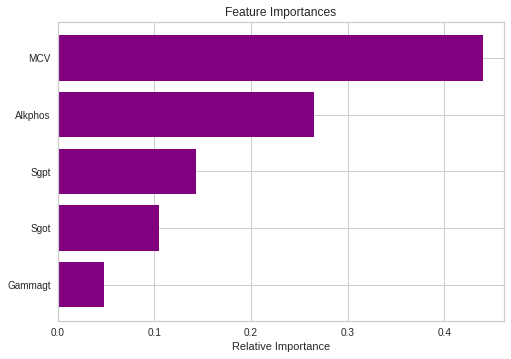

In [45]:
features = drop_new.columns
importances = model.explained_variance_ratio_
indices = np.argsort(importances)[-6:]
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='purple', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [46]:
PCA_ds = pd.DataFrame(model_transform)
PCA_ds

,0,1,2,3,4
0,0.088602,-0.091146,0.198536,-0.101871,-0.054736
1,-0.086187,-0.119374,0.076790,0.111245,-0.082344
2,0.028676,0.064056,-0.013402,-0.020852,-0.026843
3,-0.106386,0.036991,0.069404,-0.030664,0.120961
4,-0.154415,-0.083891,-0.234246,-0.039250,0.008539
...,...,...,...,...,...
339,0.041164,0.038628,-0.227580,-0.044543,0.002585
340,0.536991,-0.150832,-0.136473,0.298024,0.049701
341,0.311170,-0.026739,-0.149761,-0.014673,-0.031846
342,-0.045846,-0.003829,-0.012206,-0.072885,0.029644


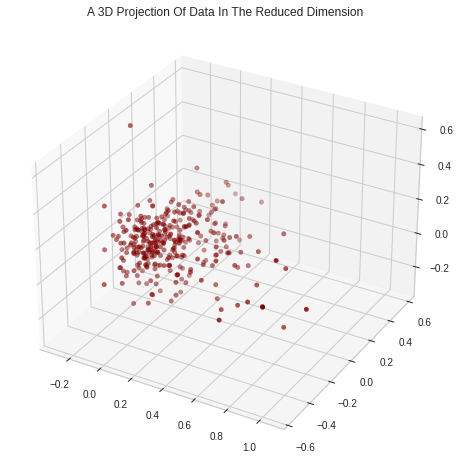

In [47]:
x =PCA_ds.iloc[:, 0:1]
y =PCA_ds.iloc[:, 1:2]
z =PCA_ds.iloc[:, 2:3]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

Elbow Method to determine the number of clusters to be formed:


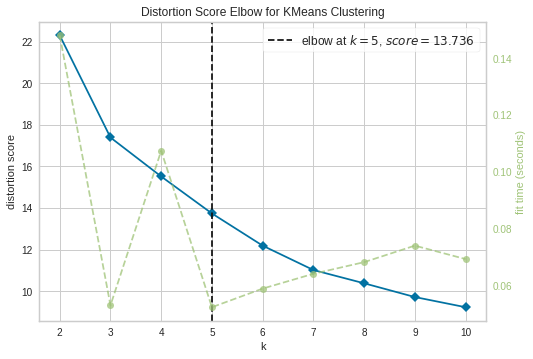

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [48]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

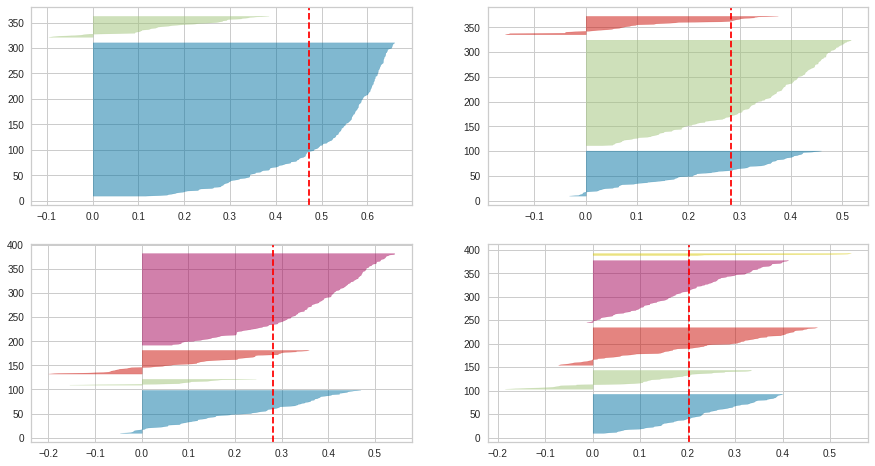

In [49]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=45)
    q, mod = divmod(i, 2)

    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(PCA_ds)

In [50]:
##Hierachical Clustering###

In [51]:
AC = AgglomerativeClustering(n_clusters=3)
# fit model and predict clusters
yhat_AC1 = AC.fit(PCA_ds)
yhat_AC = AC.fit_predict(PCA_ds)
X_scaled["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
X_scaled["Clusters"]= yhat_AC

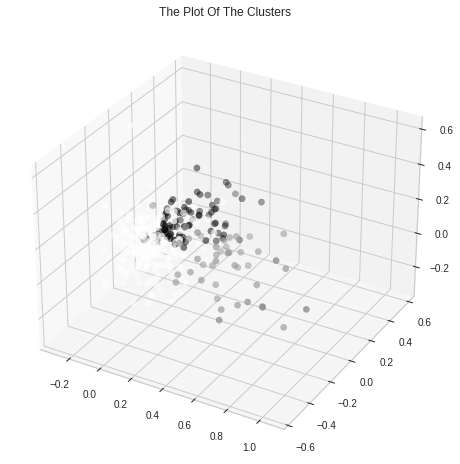

In [52]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=X_scaled["Clusters"], marker='o')
ax.set_title("The Plot Of The Clusters")
plt.show()

In [53]:
X_scaled

,MCV,Alkphos,Sgpt,Sgot,Gammagt,Clusters
0,0.526316,0.356522,0.364238,0.350649,0.061644,0
1,0.552632,0.269565,0.192053,0.142857,0.167808,0
2,0.684211,0.478261,0.198675,0.246753,0.106164,2
3,0.578947,0.408696,0.052980,0.298701,0.017123,0
4,0.868421,0.278261,0.059603,0.155844,0.041096,0
...,...,...,...,...,...,...
339,0.894737,0.452174,0.145695,0.246753,0.123288,0
340,0.815789,0.400000,0.324503,0.493506,0.678082,1
341,0.868421,0.469565,0.337748,0.389610,0.287671,1
342,0.684211,0.391304,0.152318,0.272727,0.030822,0


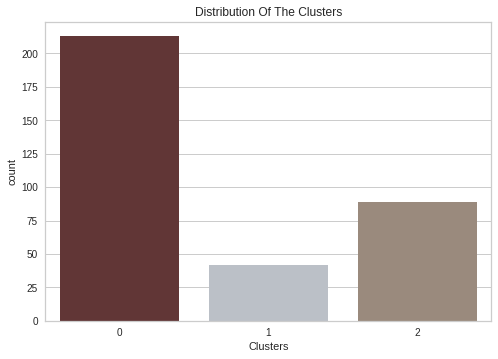

In [54]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=X_scaled["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

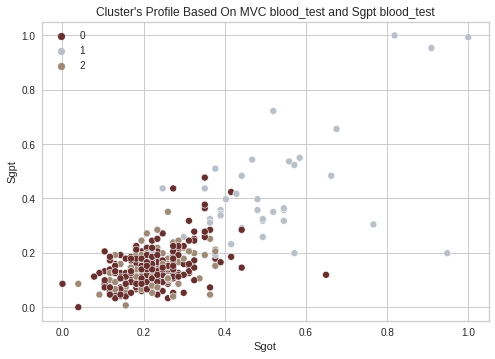

In [55]:
pal = ["#682F2F","#B9C0C9", "#9F8A78"]
pl = sns.scatterplot(data = X_scaled,x=X_scaled["Sgot"], y=X_scaled["Sgpt"],hue=X_scaled["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On MVC blood_test and Sgpt blood_test")
plt.legend()
plt.show()

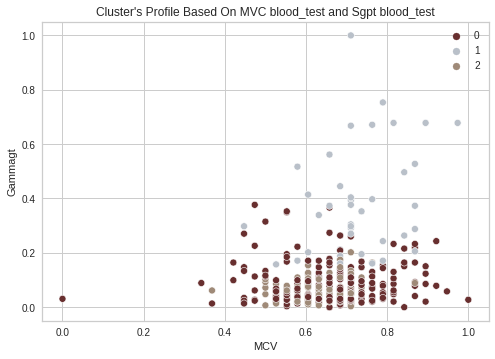

In [56]:
pal = ["#682F2F","#B9C0C9", "#9F8A78"]
pl = sns.scatterplot(data = X_scaled,x=X_scaled["MCV"], y=X_scaled["Gammagt"],hue=X_scaled["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On MVC blood_test and Sgpt blood_test")
plt.legend()
plt.show()